# Plot the monthly number of searches for flights arriving at Málaga, Madrid or Barcelona

In [81]:
import pandas as pd

%matplotlib inline

import matplotlib
matplotlib.style.use('ggplot')


def get_monthly_number_of_serches(path, delim, airports):
    """
    This functions looks for top 10 arrival airports in the world in a certain year
    
    Args:
        path(String): path where the csv file is stored
        delim(String): deliminator
        airports(Array of String): airports' name
    Returns:
        df_searches(DataFrame): contains the monthly number of searches for flights arriving at given airports
    """
    chunksize = 10 ** 6

    chunks = pd.read_csv(path, chunksize = chunksize, sep = delim, header = 0,
                       parse_dates = ['Date'], usecols = ['Date', 'Destination'])

    df = pd.DataFrame()
    df = pd.concat(chunks)

    df_searches = pd.DataFrame()
    for airport in airports:
        df_one_airport = pd.DataFrame()
        df_one_airport = df.loc[df['Destination'] == airport]
        df_one_airport['month'] = df_one_airport.apply(lambda row: (pd.to_datetime(row['Date'])).month, axis=1)
        search_count = df_one_airport.groupby('month').aggregate('count')
        df_searches[airport] = search_count['Destination']
    return df_searches

## call function get_montly_number_of_searches and store result in df_searches

In [82]:
df_searches = get_monthly_number_of_serches("../data/searches.csv", "^", ['MAD', 'AGP', 'BCN'])

/home/jinxing/.local/lib/python2.7/site-packages/IPython/kernel/__main__.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


## plot results

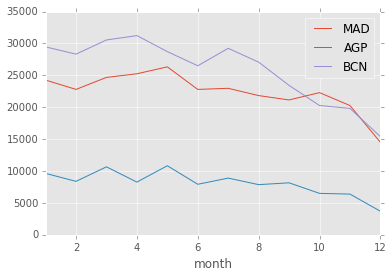

In [83]:
df_searches.plot()